In [1]:
#all the nessesary imports 
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
from mlxtend.frequent_patterns import apriori, association_rules  
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

C:\Users\shita\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\shita\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
!pip install mlxtend

In [3]:
df = pd.read_csv("book.csv")

In [4]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
df1= df.copy()

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [8]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [9]:
df1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [11]:
df1.shape

(2000, 11)

In [14]:
item_sets = {}
te = TransactionEncoder()
te_ary = te.fit(df1).transform(df1)
ap = pd.DataFrame(te_ary, columns=te.columns_)

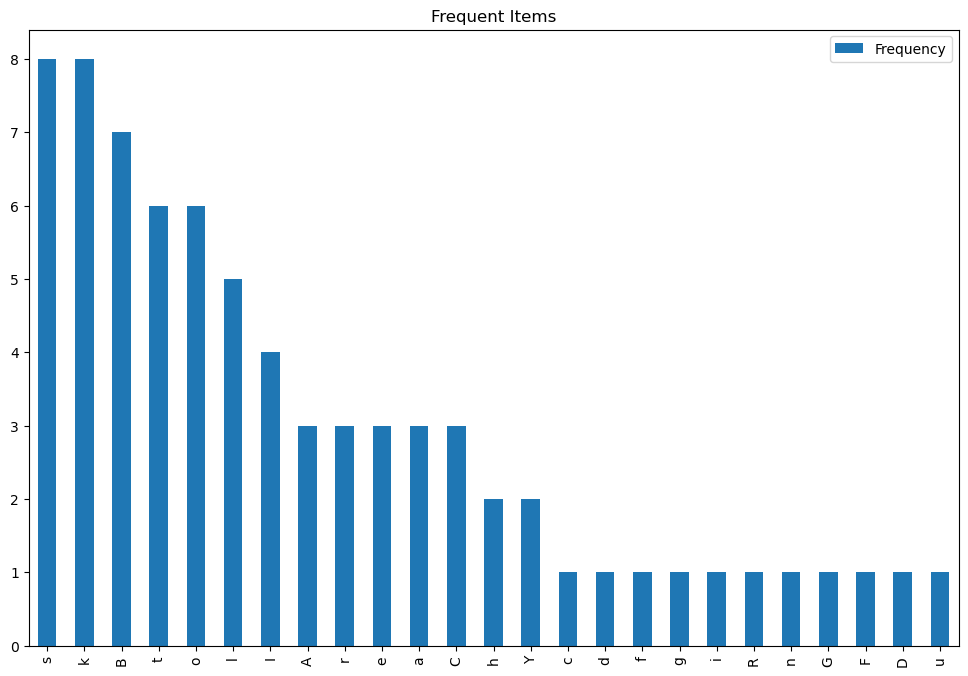

In [15]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

# Apriori algorithm

In [17]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [18]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [19]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [20]:
confs = []

In [21]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types re

C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [22]:
all_conf = pd.concat(confs,axis=1)

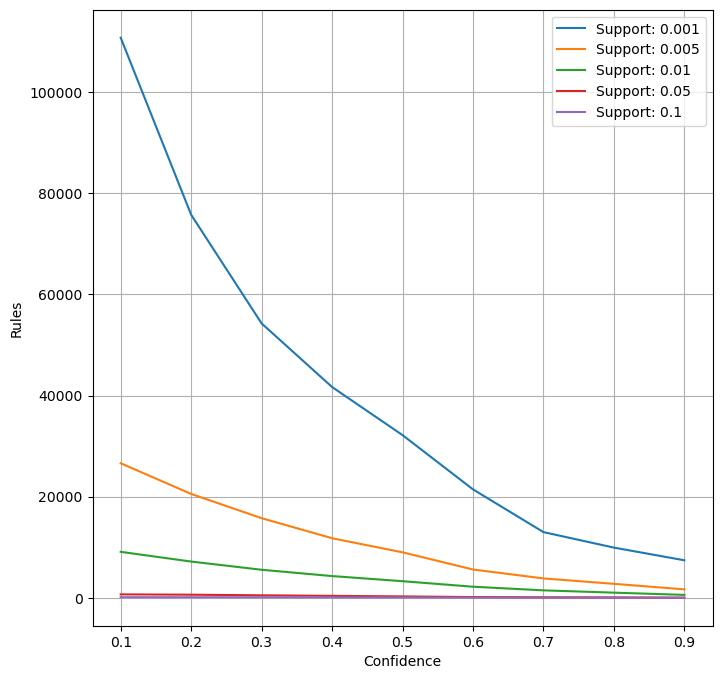

In [23]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

Lower the Confidence level Higher the no. of rules.

Higher the Support, lower the no. of rules.

# Lets Try With Support 0.01 and Confidence at 0.4

In [24]:
ap_final =  apriori(ap,0.001,True)

In [25]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [26]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
2,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
4,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
6,(A),(r),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
...,...,...,...,...,...,...,...,...,...
741,"(Y, k)","(o, s, B, t)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
742,"(Y, s)","(o, k, B, t)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
743,"(Y, B)","(o, s, k, t)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
746,"(B, t)","(o, Y, s, k)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970


In [27]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

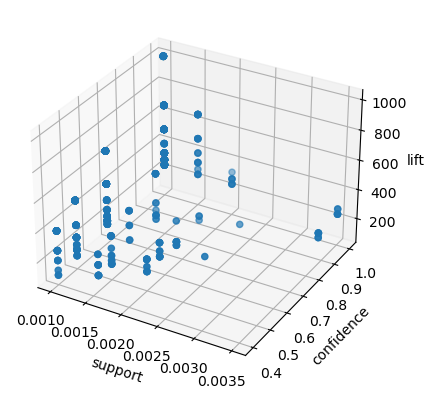

In [30]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

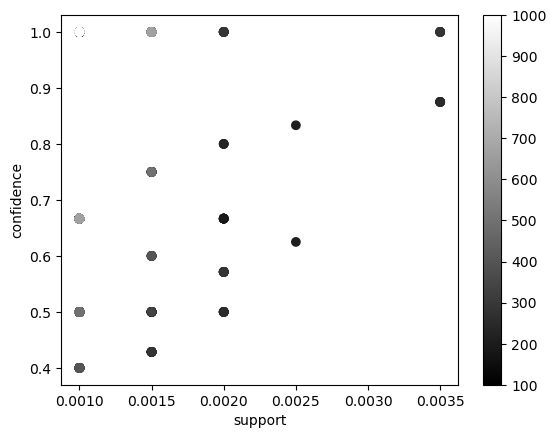

In [35]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")